In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
# Load in data from SKlearn
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
# Look at the data and targets
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


<Figure size 640x480 with 0 Axes>

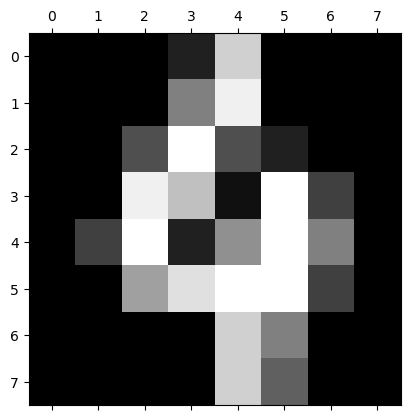

4


In [9]:
# Visualise data image at index 100
plt.gray()
plt.matshow(digits.images[100])
plt.show()

# Print out its target label
print(digits.target[100])

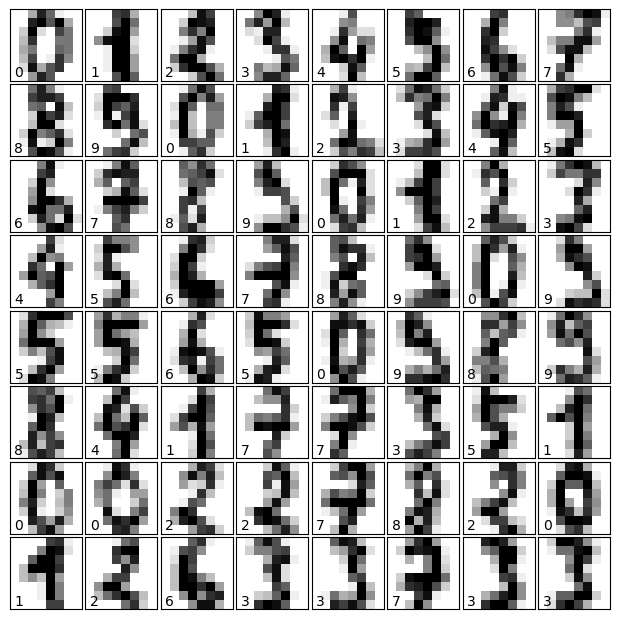

In [11]:
## Visualise multiple images at once

# Figure size (width, height)

fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images

for i in range(64):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position

    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position

    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value

    ax.text(0, 7, str(digits.target[i]))

plt.show()

#### K-Means Clustering

In [12]:
# Import K-Mean clustering
from sklearn.cluster import KMeans

# Because there are 10 digits, there should be 10 clusters
# Build K-Means model
model = KMeans(n_clusters=10, random_state=42)

# Fit the model
model.fit(digits.data)

c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

#### Visualizing after K-Means:

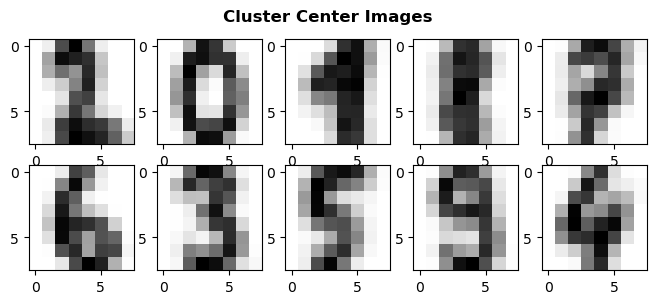

In [17]:
# Visualise the centroids(or 'cluster centers')
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Center Images', fontweight='bold')
for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), 
            cmap=plt.cm.binary)

plt.show()

#### Testing the Model

In [18]:
# Create array of new samples for a 4 digit number
new_samples = np.array([[0.00,0.07,0.76,0.76,0.45,0.00,0.00,0.00,0.66,
                         6.35,7.62,7.62,7.31,2.40,0.00,0.00,2.66,7.62,
                         3.32,2.35,6.33,7.24,0.66,0.00,0.51,2.82,0.07,
                         0.07,4.72,7.55,1.13,0.00,0.00,0.28,3.11,5.97,
                         7.62,5.61,1.90,1.14,0.00,2.28,7.62,7.62,7.62,
                         7.62,7.62,5.08,0.00,0.13,1.52,1.52,1.52,1.52,
                         1.52,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,
                         0.00],
                         [0.00,1.27,3.05,2.89,0.30,0.00,0.00,0.00,3.80,
                          7.48,7.62,7.62,6.39,0.46,0.00,0.00,7.62,5.02,
                          0.66,2.25,7.40,5.40,0.00,0.00,5.84,0.00,0.00,
                          0.00,3.66,7.62,3.73,0.00,7.62,2.86,0.00,0.00,
                          0.28,5.25,7.62,0.68,5.87,7.55,4.72,0.50,0.00,
                          3.72,7.62,0.46,0.23,4.57,7.47,7.01,5.87,7.55,
                          5.62,0.00,0.00,0.00,1.65,5.03,5.33,4.12,0.45,
                          0.00],
                          [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,
                           0.15,4.71,7.39,7.62,3.96,0.00,0.00,0.00,3.57,
                           7.62,4.87,5.25,7.55,0.61,0.00,0.00,3.80,7.38,
                           0.00,2.28,7.62,1.52,0.00,0.00,0.68,1.60,0.00,
                           3.05,7.62,1.28,0.00,0.00,0.00,1.20,4.03,7.31,
                           6.78,0.38,0.00,0.00,0.00,6.70,7.62,7.62,7.62,
                           4.49,0.00,0.00,0.00,1.20,2.29,2.29,2.29,0.91,
                           0.00],
                           [0.00,2.19,2.82,1.13,0.00,0.00,0.00,0.00,4.34,
                            7.62,7.62,7.55,3.48,0.00,0.00,0.00,6.09,5.86,
                            1.10,5.53,7.62,3.93,0.00,0.00,6.10,5.48,0.00,
                            0.07,6.63,6.41,0.00,0.00,4.86,7.40,0.46,0.00,
                            5.17,6.52,0.00,0.00,1.64,7.62,5.44,1.90,6.33,
                            6.61,0.00,0.00,0.00,3.42,7.62,7.62,7.24,2.41,
                            0.00,0.00,0.00,0.00,1.27,1.52,0.53,0.00,0.00,
                            0.00]])

In [23]:
# Predict the label of the 4 digit number
new_labels = model.predict(new_samples)
print(new_labels)

[4 8 1 9]


In [24]:
# Map out the labels with each digit based on visualisation
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(2, end='')
  elif new_labels[i] == 1:
    print(0, end='')
  elif new_labels[i] == 2:
    print(1, end='')
  elif new_labels[i] == 3:
    print(8, end='')
  elif new_labels[i] == 4:
    print(7, end='')
  elif new_labels[i] == 5:
    print(6, end='')
  elif new_labels[i] == 6:
    print(3, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(9, end='')
  elif new_labels[i] == 9:
    print(4, end='')

7904